In [1]:
#!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv


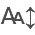

In [2]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
# opt.maxBytes = 0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [4]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  \
0              1         0  ...          0        33000            0   
1              0         0  ...          0       300000            0   
2              1         0  ...          0       216676            0   
3              1         0  ...          0        60000            0   
4              1         1  ...          0       272925            0   
...          ...       ...  ...        ...          ...          ...   
51119          1         1  ...          0       300000            0   
51120          0         0  ...          0       166098            0   
51121          1         0  ...          0        18891            0   
51122          0         0  ...          0        26528            0   
51123          1         0  ...          0        12360            0   

       EeccNac_T01  EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  \
0          1099866            0    1099866      15080          0           R   
1           214592            0     214592      83596          0           R   
2                0            0       7400          0          0           T   
3           272762            0     272762      10591          0           R   
4           249562            0      75339     377782          0           R   
...            ...          ...        ...        ...        ...         ...   
51119       478320            0     478320      12668          0           R   
51120       166098            0          0     572363          0           R   
51121         9652            0       9652      16241          0           R   
51122        24638            0      24638      84982          0           R   
51123        12360            0      18500          0          0           R   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
51119      0  
51120      0  
51121      0  
51122      0  
51123      0  

[51124 rows x 574 columns]

In [5]:
data[['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 
      'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 
      'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'target']]

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  Monoproducto  Ctacte  Consumo  Hipotecario  \
0              1         0             0       1        0            0   
1              0         0             0       1        0            1   
2              1         0             0       1        0            1   
3              1         0             1       0        0            0   
4              1         1             0       1        0            1   
...          ...       ...           ...     ...      ...          ...   
51119          1         1             0       1        0            0   
51120          0         0             0       1        0            0   
51121          1         0             0       1        0            0   
51122          0         0             0       1        0            0   
51123          1         0             0       1        0            0   

       Debito  CambioPin  Cuentas  TC  target  
0           1        NaN        1   3       0  
1           0        NaN        1   1       0  
2           1        1.0        1   2       0  
3           0        1.0        1   2       0  
4           0        1.0        2   3       0  
...       ...        ...      ...  ..     ...  
51119       1        1.0        2   3       0  
51120       1        1.0        1   1       0  
51121       1        1.0        1   2       0  
51122       0        NaN        1   1       0  
51123       1        1.0        1   2       0  

[51124 rows x 19 columns]

# Fase 1 - Comprensión del negocio

## 1.1 Introducción al negocio

Entregar las razones por las que fuimos contratados

La institución financiera "Monopoly FELIZ" ha decidido implementar el uso de aprendizaje automático en su negocio. Con este propósito, han decidido ponerse en contacto con nuestro equipo, para evaluar si con los datos almacenados por el banco se pueden crear modelos predictivos, y de ser el caso, que variables se pueden predecir con los datos que se poseen.

## 1.2 Alcance / Objetivos del proyecto

Definir los objetivos del proyecto

El objetivo general del proyecto es el desarrollo de un modelo predictivo el cual permita anticipar los comportamientos del actuar de los usuarios.

Los objetivos específicos del proyecto son...
- Realizar un análisis exploratorio para observar la naturaleza de los datos
- Definir cuales son las variables que pueden ser usadas para el desarrollo de un modelo predictivo (variable objetivo)
- Entender los datos de las variables definidas buscando nulos, incongruencias y atípicos
- Obtener medidas estadísticas de las dependenties e independientes
- Realizar una fase de testing donde se apliquen y se obtengan los estadísticos de cada técnica de tratamiento de nulos
- Analizar los resultados y definir cual es la mejor técnica de tratamiento de nulos
- Aplacar incongruencias dentro de la Data (duplicados, atípicos)
- Escalar la Data

## 1.3 Focos investigativos

El negocio requiere investigar sobre el comportamiento de los clientes, y, a partir de esto, crear un modelo predictivo el cual permita al negocio tener mayor certeza sobre acciones de sus usuarios. Para esto, se nos ha pedido inquirir sobre lo siguiente...

- Gasto en compras nacionales a través de los meses (cambio a meses criticos en caso de que no)
- Pago de la deuda relacionada a la tarjeta de credito

## algo raro

### ??? Definición de variables para análisis

In [6]:
data_copia = data.copy()

In [7]:
data_copia

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  \
0              1         0  ...          0        33000            0   
1              0         0  ...          0       300000            0   
2              1         0  ...          0       216676            0   
3              1         0  ...          0        60000            0   
4              1         1  ...          0       272925            0   
...          ...       ...  ...        ...          ...          ...   
51119          1         1  ...          0       300000            0   
51120          0         0  ...          0       166098            0   
51121          1         0  ...          0        18891            0   
51122          0         0  ...          0        26528            0   
51123          1         0  ...          0        12360            0   

       EeccNac_T01  EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  \
0          1099866            0    1099866      15080          0           R   
1           214592            0     214592      83596          0           R   
2                0            0       7400          0          0           T   
3           272762            0     272762      10591          0           R   
4           249562            0      75339     377782          0           R   
...            ...          ...        ...        ...        ...         ...   
51119       478320            0     478320      12668          0           R   
51120       166098            0          0     572363          0           R   
51121         9652            0       9652      16241          0           R   
51122        24638            0      24638      84982          0           R   
51123        12360            0      18500          0          0           R   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
51119      0  
51120      0  
51121      0  
51122      0  
51123      0  

[51124 rows x 574 columns]

In [8]:
data_copia.CUPO_L2 = data_copia['CUPO_L2'].replace(',','.', regex=True).astype('float')
data_copia.CUPO_L2.describe()

count    5.112400e+04
mean     3.283759e+05
std      7.578185e+05
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      2.360292e+05
max      1.255000e+07
Name: CUPO_L2, dtype: float64

In [9]:
data_select = data[['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 
      'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 
      'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'target']]
data_select

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  Monoproducto  Ctacte  Consumo  Hipotecario  \
0              1         0             0       1        0            0   
1              0         0             0       1        0            1   
2              1         0             0       1        0            1   
3              1         0             1       0        0            0   
4              1         1             0       1        0            1   
...          ...       ...           ...     ...      ...          ...   
51119          1         1             0       1        0            0   
51120          0         0             0       1        0            0   
51121          1         0             0       1        0            0   
51122          0         0             0       1        0            0   
51123          1         0             0       1        0            0   

       Debito  CambioPin  Cuentas  TC  target  
0           1        NaN        1   3       0  
1           0        NaN        1   1       0  
2           1        1.0        1   2       0  
3           0        1.0        1   2       0  
4           0        1.0        2   3       0  
...       ...        ...      ...  ..     ...  
51119       1        1.0        2   3       0  
51120       1        1.0        1   1       0  
51121       1        1.0        1   2       0  
51122       0        NaN        1   1       0  
51123       1        1.0        1   2       0  

[51124 rows x 19 columns]

In [10]:
# Tranformación de String / Object a Float
data_copia.Renta = data_copia['Renta'].replace(',','.', regex=True).astype('float')

In [11]:
data_copia.Renta.dtypes

dtype('float64')

In [12]:
data_copia.Renta

0             NaN
1        143640.0
2        929106.0
3        172447.0
4        805250.0
           ...   
51119    364978.0
51120    625376.0
51121    806220.0
51122         NaN
51123    840878.0
Name: Renta, Length: 51124, dtype: float64

In [13]:
data_copia[['Renta', 'target']][data_copia.Renta.isnull()]

Renta  target
0        NaN       0
7        NaN       0
10       NaN       0
11       NaN       0
15       NaN       0
...      ...     ...
51085    NaN       0
51100    NaN       1
51111    NaN       0
51116    NaN       1
51122    NaN       0

[13365 rows x 2 columns]

In [14]:
corr_data = data_copia.corr(numeric_only=True)
corr_data.Renta

Id             0.015980
Subsegmento    0.010060
Region        -0.007266
Edad           0.143001
Renta          1.000000
                 ...   
ColL2AC_T01    0.016796
ColL2CC_T01    0.053663
PagoNac_T01    0.095831
UsoL2_T01      0.035728
target        -0.013111
Name: Renta, Length: 444, dtype: float64

In [15]:
corr_data.Renta.sort_values(ascending = False)

Renta             1.000000
CUPO_L1           0.289283
Hipotecario       0.222307
Edad              0.143001
FacDebCom_T12     0.122906
                    ...   
FlgActCCPC_T05   -0.078395
FlgActCCPC_T08   -0.080484
FlgActCCPC_T09   -0.080523
FlgActCCPC_T07   -0.081190
CambioPin              NaN
Name: Renta, Length: 444, dtype: float64

In [16]:
corr_data.Edad.sort_values(ascending = False)

Edad            1.000000
Antiguedad      0.524487
CUPO_L1         0.443795
Id              0.332918
Monoproducto    0.243881
                  ...   
Ctacte         -0.244444
Debito         -0.363856
Internauta     -0.389240
Subsegmento    -0.519442
CambioPin            NaN
Name: Edad, Length: 444, dtype: float64

In [17]:
corr_data.Antiguedad.sort_values(ascending = False)

Antiguedad      1.000000
Edad            0.524487
CUPO_L1         0.522510
Adicional       0.284226
Monoproducto    0.230606
                  ...   
Internauta     -0.186996
Ctacte         -0.236351
Subsegmento    -0.271497
Debito         -0.367517
CambioPin            NaN
Name: Antiguedad, Length: 444, dtype: float64

In [18]:
corr_data.Region.sort_values(ascending = False)

Region           1.000000
Adicional        0.097302
TC               0.069545
FlgActPAT_T05    0.064742
FlgActPAT_T07    0.064577
                   ...   
TxsCCPC_T06     -0.032132
TxsCCPC_T05     -0.035676
Subsegmento     -0.047450
Ctacte          -0.047878
CambioPin             NaN
Name: Region, Length: 444, dtype: float64

In [19]:
data_copia.shape

(51124, 574)

### 2.1.4 Existencia de incongruencias en la data

NOTA PERSONAL

Al utilizar [] para hacer una cláusula Where, algo parece pasar con los nulos que no tengo particularmente claro.

De acuerdo a la referencia 1, podemos ver de que efectivamente hay registros donde "Edad" y "Antiguedad" presentan incongruencias.

In [20]:
# Referencia 1
data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad].reindex().iloc[0]

Edad           43
Antiguedad    130
Name: 0, dtype: int64

In [21]:
# Referencia 1
data_select[['Edad', 'Antiguedad']].iloc[3]

Edad           46
Antiguedad    134
Name: 3, dtype: int64

In [22]:
data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad].reindex()

Edad  Antiguedad
0        43         130
1        46          69
3        46         134
4        46         116
5        47          67
...     ...         ...
51116    49          66
51117    50          62
51119    51          57
51121    47         153
51123    51          75

[17816 rows x 2 columns]

In [23]:
data_select[['Edad', 'Antiguedad']].where(data.Antiguedad > data.Edad)

Edad  Antiguedad
0      43.0       130.0
1      46.0        69.0
2       NaN         NaN
3      46.0       134.0
4      46.0       116.0
...     ...         ...
51119  51.0        57.0
51120   NaN         NaN
51121  47.0       153.0
51122   NaN         NaN
51123  51.0        75.0

[51124 rows x 2 columns]

In [24]:
#incongruencia_edad = data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad]
incongruencia_edad = data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad]
count_incongruencias_edadantiguedad = len(incongruencia_edad)

txt = ("Hay un total de {:,} registros que presentan una incongruencia de mayor Antiguedad que Edad dentro de la Data")
print(txt.format(count_incongruencias_edadantiguedad))

Hay un total de 17,816 registros que presentan una incongruencia de mayor Antiguedad que Edad dentro de la Data


# Fase 2 - Comprensión de los datos

## 2.1 Análisis exploratorio inicial

Se busca entregar datos como
- Dimensiones de la data
- Existen Nulos
- Existencia de incongruencias en la data
- Razonamientos para los duplicados
    - Esto refiere al hecho de que al escoger una cantidad de columnas X, podemos hacer que 2 registros que se diferencian entre sí por una columna que no fue escogida, ahora sean exactamente iguales, lo cual puede dificultar el análisis de la data

### 2.1.1 Dimensiones de la data

In [25]:
row_data = data.shape[0]
column_data = data.shape[1]

print(f"La data presenta un total de {row_data} clientes y {column_data} características")

La data presenta un total de 51124 clientes y 574 características


### 2.1.2 Análisis de variables objetivo

## 2.2 Variable objetivo

De acuerdo al contexto de negocio, establecimos las siguientes características como las variables objetivo.

Para el caso de compras nacionales fue definido FacCN_T99, ya que este refleja el monto facturado por mes en compras nacionales. El poder predecir esta variable permitiría al negocio realizar convenios que incentiven el uso de sus tarjetas en meses donde se prediga una mayor cantidad de dinero.

Por otro lado, para el caso del "pago de la deuda de la tarjeta", la variable "target" fue definida para esto. Poder predecir esta variable permitirá al negocio saber cuales clientes son potenciales deudores.

Dentro de esta sección se puede ver todas las características relacionadas a los focos de investigación.

### 2.2.1 Variable 'Target'

In [26]:
# variable target
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Actualmente la característica 'target' es de tipo 'int64'.

In [27]:
data['target'].dtypes

dtype('int64')

La data no posee valores fuera del 0 y del 1

In [28]:
data['target'].unique()

array([0, 1])

### 2.2.2 Variable 'FacCN_T99'

Esta variable se encuentra compuesta de todos los meses del año, es decir, desde T01 (Enero) - T012 (Diciembre).

In [29]:
# Variable gasto compras nacionales
data.filter(regex='FacCN_T')

FacCN_T12 FacCN_T11 FacCN_T10  FacCN_T09  FacCN_T08  FacCN_T07  \
0         55490         0     14630    26980.0    67434.0   115644.0   
1         19813    291725    100918    98584.0   231245.0    63589.0   
2        123950     97474      6500    55290.0   667420.0   215061.0   
3         44470     72416     23003    44990.0    43015.0        0.0   
4        138225    526687    164532   488217.0   532414.0   158949.0   
...         ...       ...       ...        ...        ...        ...   
51119     78520     71470     21970   172086.0    74595.0    95750.0   
51120         0     29745         0        0.0        0.0        0.0   
51121     66040         0         0        0.0        0.0    37900.0   
51122       NaN       NaN     24500    25000.0    46100.0    48000.0   
51123     73300         0         0        0.0        0.0    19990.0   

      FacCN_T06  FacCN_T05  FacCN_T04 FacCN_T03  FacCN_T02  FacCN_T01  
0        106045        0.0        0.0         0        0.0          0  
1             0    27990.0        0.0      5678    14293.0     118247  
2         59840    69822.0   133940.0      6650    57929.0     191336  
3         82462    22592.0    34458.0     27000     7990.0      11890  
4        323687   312172.0   135979.0    237926   334904.0     173576  
...         ...        ...        ...       ...        ...        ...  
51119     86550    54910.0    24108.0     40080    44048.0      62808  
51120    986252    93203.0        0.0    275688        0.0          0  
51121         0    40970.0        0.0         0    24259.0          0  
51122     34700    18500.0    46000.0     25000    26000.0     108982  
51123     11000        0.0        0.0     20000        0.0      15000  

[51124 rows x 12 columns]

#### 2.2.2.1 Tipo de dato por característica

Se detectó de que algunos de estos meses fueron registrados dentro de la data con un tipo de dato que no correspondía, el cual es 'Object'.

In [30]:
data['FacCN_T12'].dtypes

dtype('O')

In [31]:
data['FacCN_T02'].dtypes

dtype('float64')

Aunque esto tendría que ser solucionado en la siguiente fase (preparación de datos), es imperativo que esto sea solucionado ahora para los cálculos de correlación (Sección 2.3). Para solucionar esto se obtendrán todas las columnas que poseen un tipo de dato el cual no sea 'float64', y se reemplazará su tipo por este.

In [32]:
data.filter(regex='FacCN_T').dtypes[data.filter(regex='FacCN_T').dtypes != 'float64']

FacCN_T12    object
FacCN_T11    object
FacCN_T10    object
FacCN_T06    object
FacCN_T03    object
FacCN_T01     int64
dtype: object

Se registran un total de 6 características de tipo no 'float64'

In [33]:
len(data.filter(regex='FacCN_T').columns[data.filter(regex='FacCN_T').dtypes != 'float64'])

6

In [34]:
# Cambio a tipo de dato float
for i in range(12): # range se deja como 12 en vez de buscar el número de columnas de FacCN ya que como regla de negocio se registran los meses del 1 al 12
    i = i + 1
    i = str(i).zfill(2)

    a = f'FacCN_T{i}'

    dtype = data[a].dtypes
    
    if dtype == 'float64':
        pass
    else:
        data[a] = data[a].replace(',','.', regex=True).astype('float')

Transformadas las características, comprobamos de que los cambios se hayan realizado

In [35]:
data.filter(regex='FacCN_T').dtypes[data.filter(regex='FacCN_T').dtypes != 'float64']

Series([], dtype: object)

#### 2.2.2.2 Reconocimiento de incrongruencias dentro de la variable

Dentro de las variables existe la posibilidad de que hayan valores negativos, lo cual sería una incongruencia considerando de que hablamos de monto gastado. Para detectar esto se buscarán dentro de cada columna valores negativos, se rescatarán estas columnas y se verá porcentualmente del total de la data de la columna cuantos valores son negativos.

##### Reconocimiento de meses con valores negativos

In [36]:
negFacCN_T01 = data.FacCN_T01[data.FacCN_T01 < 0]
negFacCN_T01

3318     -49990.0
11118    -13420.0
21249    -20000.0
30106    -49903.0
36862     -5510.0
38001   -119900.0
44241    -78500.0
Name: FacCN_T01, dtype: float64

In [37]:
negFacCN_T02 = data.FacCN_T02[data.FacCN_T02 < 0]
negFacCN_T02

10972    -23093.0
13416   -200000.0
13453   -337779.0
21738    -41384.0
29043    -15100.0
30580    -73270.0
30962    -48932.0
38721   -136789.0
46213   -107750.0
Name: FacCN_T02, dtype: float64

In [38]:
negFacCN_T03 = data.FacCN_T03[data.FacCN_T03 < 0]
negFacCN_T03 

16514   -103979.0
16779    -21900.0
40096    -92890.0
46255     -9990.0
47068    -33382.0
49946   -292344.0
Name: FacCN_T03, dtype: float64

In [39]:
negFacCN_T04 = data.FacCN_T04[data.FacCN_T04 < 0]
negFacCN_T04

170       -4873.0
15164     -5000.0
17687   -178883.0
24209     -4800.0
24533    -90190.0
30137   -233190.0
36908    -52410.0
Name: FacCN_T04, dtype: float64

In [40]:
negFacCN_T05 = data.FacCN_T05[data.FacCN_T05 < 0]
negFacCN_T05

1071      -8075.0
1805     -74180.0
5637      -8480.0
8266     -40620.0
8370      -2040.0
10175    -22480.0
16332    -31490.0
17849    -19900.0
21961   -890000.0
22781    -30970.0
23775     -9990.0
24209   -129920.0
25028     -4366.0
27231    -11990.0
27412   -181510.0
28356   -146810.0
29561    -30522.0
30225    -16090.0
46169     -2740.0
48947      -970.0
49450    -54890.0
Name: FacCN_T05, dtype: float64

In [41]:
negFacCN_T06 = data.FacCN_T06[data.FacCN_T06 < 0]
negFacCN_T06

2382     -29990.0
3280     -42160.0
3549     -39990.0
5285       -164.0
6952    -463480.0
8056    -179473.0
10065    -59990.0
10722    -10980.0
11685    -42410.0
12400    -32110.0
15880    -12570.0
20151    -44980.0
21711    -55540.0
21793   -273660.0
21930    -51990.0
25264    -31790.0
29184    -35641.0
29921   -246970.0
30090    -60692.0
31144    -28000.0
34026    -14000.0
41767    -14990.0
47950    -55790.0
Name: FacCN_T06, dtype: float64

In [42]:
negFacCN_T07 = data.FacCN_T07[data.FacCN_T07 < 0]
negFacCN_T07

4371    -156224.0
5149     -30000.0
5211     -21990.0
12152    -33990.0
16367     -3290.0
28938    -18970.0
36795   -188990.0
39483   -196366.0
Name: FacCN_T07, dtype: float64

In [43]:
negFacCN_T08 = data.FacCN_T08[data.FacCN_T08 < 0]
negFacCN_T08

915     -194587.0
957      -20900.0
3106      -5570.0
4897     -25000.0
5117     -10450.0
6256    -116036.0
6558        -30.0
10200    -22090.0
12698     -3070.0
15269    -41890.0
15549   -166984.0
16240    -14340.0
18906    -94861.0
20094    -71903.0
25851    -24277.0
32419    -42990.0
36974    -38455.0
37026    -25635.0
37993   -382370.0
38105   -162510.0
46721    -31133.0
49605   -142562.0
Name: FacCN_T08, dtype: float64

In [44]:
negFacCN_T09 = data.FacCN_T09[data.FacCN_T09 < 0]
negFacCN_T09

2816     -20000.0
9564     -72000.0
21524    -41890.0
24365   -152000.0
29650    -17090.0
Name: FacCN_T09, dtype: float64

In [45]:
negFacCN_T10 = data.FacCN_T10[data.FacCN_T10 < 0]
negFacCN_T10

6629     -24900.0
11013    -38712.0
17515    -66523.0
33377    -23259.0
45546   -186497.0
Name: FacCN_T10, dtype: float64

In [46]:
negFacCN_T11 = data.FacCN_T11[data.FacCN_T11 < 0]
negFacCN_T11

9305    -2418286.0
19837    -109700.0
25018    -140890.0
26123     -49990.0
28969    -107970.0
36957    -178450.0
Name: FacCN_T11, dtype: float64

In [47]:
negFacCN_T12 = data.FacCN_T12[data.FacCN_T12 < 0]
negFacCN_T12

1579     -39593.0
19589    -33251.0
21253    -39990.0
40294    -36280.0
45434   -480000.0
Name: FacCN_T12, dtype: float64

##### Revisión de valores negativos

In [48]:
total_negativos = 0

for i in range(1, 13):
    key = f'negFacCN_T{str(i).zfill(2)}'
    total_negativos += len(globals()[key])

print('Se encuentran un total de', total_negativos, 'valores negativos dentro del total de los meses')

Se encuentran un total de 124 valores negativos dentro del total de los meses


De acuerdo a lo revisado, se determinó que no es necesario hacer una transformación de datos para obtener la correlación de esta variable. La transformación pertinente para resolver esta incongruencia será efectuada en la Fase 3 del proyecto.

## 2.3 Matriz de correlación

Dentro de esta sección se determinarán cuales son las variables que más nos ayudarán a predecir lo definido en la sección anterior (2.2). Para determinar esto se hará una matriz de correlación, se analizará la correlación que tiene con otras variables y, de acuerdo a eso, se verá si es que es posible utilizar la variable en un modelo predictivo.

El primer paso para esto será crear una nueva característica la cual sea la suma de todas las columnas que representan meses para el monto facturado por mes.

In [49]:
corr_data = data.corr(numeric_only=True)
corr_data.head()

Id  Subsegmento    Region      Edad  Antiguedad  \
Id           1.000000     0.054252 -0.013686  0.332918    0.145347   
Subsegmento  0.054252     1.000000 -0.047450 -0.519442   -0.271497   
Region      -0.013686    -0.047450  1.000000  0.010729    0.046028   
Edad         0.332918    -0.519442  0.010729  1.000000    0.524487   
Antiguedad   0.145347    -0.271497  0.046028  0.524487    1.000000   

             Internauta  Adicional  Dualidad  Monoproducto    Ctacte  ...  \
Id            -0.155182   0.050817 -0.093430      0.084117 -0.077225  ...   
Subsegmento    0.207811  -0.159026 -0.140818     -0.157122  0.160693  ...   
Region         0.054414   0.097302  0.014180      0.047502 -0.047878  ...   
Edad          -0.389240   0.235544  0.013080      0.243881 -0.244444  ...   
Antiguedad    -0.186996   0.284226 -0.029773      0.230606 -0.236351  ...   

             TxsDebCom_T01  FacDebAtm_T01  TxsDebAtm_T01  ColL1T0_T01  \
Id               -0.100949      -0.070630      -0.094866     0.013054   
Subsegmento      -0.006115      -0.045977       0.013761    -0.080953   
Region            0.053479       0.017807       0.032112     0.024356   
Edad             -0.080030      -0.027344      -0.112253     0.125522   
Antiguedad       -0.012350      -0.021720      -0.054630     0.112794   

             ColL2T0_T01  ColL2AC_T01  ColL2CC_T01  PagoNac_T01  UsoL2_T01  \
Id             -0.005226    -0.017572    -0.003318     0.000309  -0.017258   
Subsegmento    -0.036608    -0.019625    -0.047635    -0.074260  -0.036433   
Region         -0.002210     0.023107     0.010010     0.017824   0.024365   
Edad            0.026142     0.001501     0.034772     0.102946   0.016585   
Antiguedad      0.003716    -0.012038     0.005907     0.105192  -0.006020   

               target  
Id           0.018496  
Subsegmento -0.021646  
Region      -0.014621  
Edad         0.055389  
Antiguedad   0.029404  

[5 rows x 447 columns]

### 2.3.1 Monto Facturado por mes

Para obtener la correlación de esta característica se decidió sumar cada uno de los meses en una nueva columna a través de la cual se obtendrán las mejores correlaciones para apoyar el modelo predictivo. La razón de esto es porque si analizamos la mejor correlación de cada característica uno por uno, se obtendrán características distintas para apoyar la predicción de cada mes, provocando así una elección engorrosa de variables para la predicción.

In [50]:
data.FacCN_T01.head()

0         0.0
1    118247.0
2    191336.0
3     11890.0
4    173576.0
Name: FacCN_T01, dtype: float64

Se suma la cantidad de cada mes a una columna año para así poder obtener las mejores correlaciones generales.

In [51]:
data['columna_año'] = pd.Series(dtype='Int64')
columna_año = 0

for i in range(1, 13):
    columna_mes = data[f'FacCN_T{str(i).zfill(2)}']
    columna_año += columna_mes

data.columna_año = columna_año

In [52]:
data.columna_año

0         386223.0
1         972082.0
2        1685212.0
3         414286.0
4        3527268.0
           ...    
51119     826895.0
51120    1384888.0
51121     169169.0
51122          NaN
51123     139290.0
Name: columna_año, Length: 51124, dtype: float64

Se obtienen las correlaciones de acuerdo a 'columna_año'.

In [53]:
corr_data = data.corr(numeric_only=True)['columna_año']
corr_data

Id             0.013476
Subsegmento   -0.122252
Region         0.024784
Edad           0.171142
Antiguedad     0.164703
                 ...   
ColL2CC_T01    0.132180
PagoNac_T01    0.368336
UsoL2_T01      0.045749
target        -0.144088
columna_año    1.000000
Name: columna_año, Length: 448, dtype: float64

Se filtran las correlaciones para no mostrar aquellas que se utilizaron para crear columna_año y se ordena de mayor a menor las correlaciones para ver la mejor alternativa.

In [54]:
correlacion_filtrada = corr_data[~corr_data.index.str.startswith('FacCN_T')]
correlacion_filtrada.sort_values(ascending=False)

columna_año      1.000000
ColL1T0_T07      0.552336
ColL1T0_T06      0.542962
ColL1T0_T08      0.534789
ColL1T0_T09      0.529421
                   ...   
FlgActPAT_T09   -0.048628
Debito          -0.117760
Subsegmento     -0.122252
target          -0.144088
CambioPin             NaN
Name: columna_año, Length: 436, dtype: float64

INTERPRETACIÓN

De acuerdo a lo obtenido se concluye de que...
- El valor más bajo negativo es target, el cual llega a un 14%. Este valor es demasiado bajo para ser considerado para un modelo predictivo.
- El valor más alto es 'ColL1T0_T07', con un 55%.
- Desde 'ColL1T0_T05' a 'ColL1T0_T10' se puede ver una fuerte correlación con la variable objetivo. Es decir, en la medida que el credito rotativo sea mayor, mayor también será el gasto efectuado en compras nacionales.
- TxsCN T03, T04 y T06 poseen una fuerte correlación con la variable objetivo. Esto se debe a que en la medida que mayor sea la cantidad de transacciones nacionales efectuadas, mayor también será el gasto en compras nacionales.

De acuerdo al análisis se determinan las siguientes variables para los modelos predictivos.
- Desde 'ColL1T0_T05' a 'ColL1T0_T10'
- TxsCN T03, T04 y T06

### 2.3.2 Pago realizado de tarjeta de credito

Se descartan la columna "target" para evitar el calculo por si misma e "Id" por representar solo el valor identificador del cliente sin añadir mas contexto. Las correlaciones están ordenadas de mayor a menor.

In [55]:
correlaciones_target = data.corr(numeric_only=True)["target"].drop(labels=["target", "Id"])
correlaciones_target.sort_values(ascending=False)

Monoproducto    0.072106
ColL2CC_T06     0.066400
ColL2CC_T07     0.065430
ColL2CC_T08     0.062614
ColL2CC_T09     0.062305
                  ...   
FlgActCN_T04   -0.222971
FlgActCN_T01   -0.249027
FlgActCN_T03   -0.254062
FlgActCN_T02   -0.259991
CambioPin            NaN
Name: target, Length: 446, dtype: float64

A partir del cálculo, se puede concluir por su correlación negativa con la variables "FlgActCN_T99", que al poseer un mayor indice de actividad en compras nacionales, la posibilidad de que el cliente pague la deuda de su tarjeta de crédito, disminuye. En cambio, hay una positiva pero débil relación entre la posesión de más de una tarjeta de crédito y el pago de la deuda.

## 2.4 Reconocimiento de nulos

In [56]:
total_nulos = data.isna().sum()[data.isna().sum() > 0].count()
print(f"La data presenta un total de {total_nulos} características que poseen valores nulos")

La data presenta un total de 511 características que poseen valores nulos


Pretende ir in depth en el reconocimiento
- De acuerdo a las variables definidas para trabajar, porcentaje de nulos
- Definir si pueden ser ocupadas para el proyecto

### 2.4.1 Nulos de variable Target

In [57]:
tar_nulos = data['target'].isnull().sum()
tar_porc = (data['target'].isnull().sum() / len(data)) * 100
print(f'Target posee {tar_nulos} valores nulos, representando el {tar_porc}% de los registros de la variable.')

Target posee 0 valores nulos, representando el 0.0% de los registros de la variable.


### 2.4.2 Nulos de variable FacCN_T99 

A partir del cálculo de valores nulos sobre los montos mensuales facturado en compras nacionales, se obtiene que para el mes de enero (T01) no se registran nulos. Sin embargo, desde febrero (T02) hasta diciembre (T12), se observa un aumento en la ausencia de valores y su porcentaje, respectivamente.

In [58]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

Nulos  Porcentaje (%)
FacCN_T01      0            0.00
FacCN_T02     12            0.02
FacCN_T03     10            0.02
FacCN_T04     19            0.04
FacCN_T05     25            0.05
FacCN_T06     43            0.08
FacCN_T07    833            1.63
FacCN_T08   2200            4.30
FacCN_T09   3800            7.43
FacCN_T10   5191           10.15
FacCN_T11   6632           12.97
FacCN_T12   8251           16.14

## 2.5 Reconocimiento de valores duplicados

Cada registro representa una persona, por tanto debería ser imposible que hayan duplicados dentro de la Data. Para comprobar esto se utilizarán 2 metodologías, la primera es buscar duplicados dentro de la Data en general; mientras que por otro lado la segunda dropeará la característica 'Id' y volverá a hacer el mismo procedimiento de la primera. Sabemos que es altamente improbable, pero no imposible, de que una persona tenga exactamente los mismos datos que otro, por tanto es crucial determinar, en caso de que pase, la cantidad de veces que pasa y como esto puede manchar la Data.

### 2.5.1 Metodología 1

In [59]:
duplicados = len(data[data.duplicated()])
print(f'La Data presenta {duplicados} valores duplicados con la primera metodología')

La Data presenta 0 valores duplicados con la primera metodología


### 2.5.2 Metodología 2

In [60]:
data_copia = data.copy()
data_copia.drop(['Id'], axis=1)
duplicados = len(data_copia[data_copia.duplicated()])
print(f'La Data presenta {duplicados} valores duplicados con la segunda metodología metodología')

La Data presenta 0 valores duplicados con la segunda metodología metodología


### 2.5.3 Conclusiones

De acuerdo a los resultados, se determina de que no existen valores duplicados dentro de la Data.

## 2.6 Análisis y captura de estadísticos previo a la transformación de datos

En la presente sección se verán el total de los estadísticos de cada variable objetivo, y se obtendrá un estadístico de cada uno (en caso de target, target; mientras que en el caso de las facturas de compras nacionales, los meses que se consideren pertinentes) para el testeo de nulos de la fase 3.

### 2.6.1 Variables Discretas

In [61]:
copia_target = data[['target']].copy()
copia_target['target'] = copia_target['target'].astype('object')

In [62]:
copia_target['target'].describe()

count     51124
unique        2
top           0
freq      46524
Name: target, dtype: int64

---
INTERPRETACIÓN

En 'count' se observa que no hay valores nulos respecto al total de 51.124 registros de clientes. Posee solo dos valores posibles, 0 y 1, representados en 'unique', de los cuales la moda (top) es 0 con una frecuencia (freq) de 46524 registros, por lo que se puede concluir que en su mayoría, los usuarios de la tarjeta de crédito no pagan la deuda de esta.

---

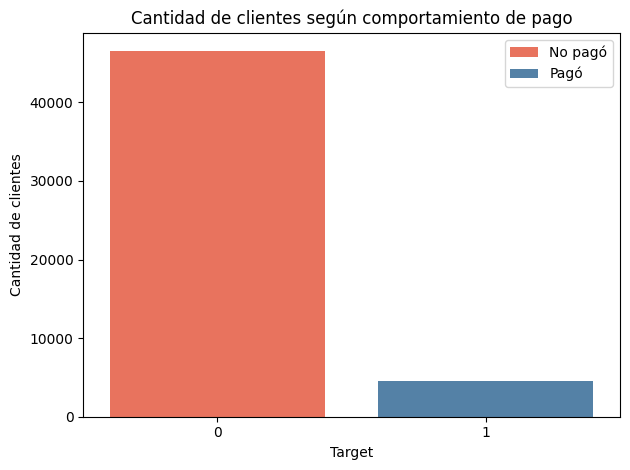

In [63]:
sns.countplot(x='target', data=data[data['target'] == 0], color='tomato', label='No pagó')
sns.countplot(x='target', data=data[data['target'] == 1], color='steelblue', label='Pagó')

plt.title('Cantidad de clientes según comportamiento de pago')
plt.xlabel('Target')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.tight_layout()
plt.show()

El gráfico de barras permite visualizar la diferencia significativa entre la cantidad de clientes que no pagaron la deuda de su tarjeta de crédito, representados como un 0 en los datos, y aquellos que no poseen deudas impagas, representados por 1. Aquellos que poseen deudas superan los 40.000 registros a diferencia de los menos de 10000 que pagaron.

Se guardan en una variable la data de la característica 'target'

In [64]:
testing_target = data.target.describe()
testing_target

count    51124.000000
mean         0.089977
std          0.286152
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

### 2.6.2 Variables Continuas

En esta sección se verán todas las variables cuantitativas, y la variable recogida de Testing

In [132]:
round(data[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']].describe(), 2)

FacCN_T01  FacCN_T02  FacCN_T03  FacCN_T04  FacCN_T05  FacCN_T06
count   46883.00   47049.00   47246.00   47141.00   46772.00   46738.00
mean    33402.26   39103.74   42461.65   39820.57   31380.69   36001.48
std     45745.87   51378.62   54862.07   51792.53   42908.59   48076.08
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%      9658.00   15546.00   18440.00   16590.00    9974.50   13990.00
75%     54990.00   63522.00   69522.50   64920.00   50994.00   58138.75
max    183670.00  207863.00  221402.00  209916.00  174013.00  196125.00

In [131]:
round(data[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']].describe(), 2)

FacCN_T07  FacCN_T08  FacCN_T09  FacCN_T10  FacCN_T11  FacCN_T12
count   46636.00   44878.00   43495.00   41895.00   40746.00   39188.00
mean    43690.57   33059.08   34348.51   29523.67   32654.50   31786.98
std     54816.44   44345.78   45630.53   40763.58   43798.70   43835.14
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%     21153.00   11485.00   12949.00    7826.00   11174.50    8164.00
75%     71187.00   53744.25   56260.00   48309.00   53552.75   52317.75
max    223272.00  179748.00  185758.00  165950.00  178490.00  177804.00

--- 
INTERPRETACIÓN

En 'count' se observa la presencia de valores nulos respecto al total de registros correspondientes a 51.124 registros para todas las variables, exceptuando FacCN_T01. En 'mean' se aprecian valores de promedio que varían entre 55.256 CLP a 69.348 CLP. En 'min' se obtienen montos mínimos negativos, indicando la existencia de incongruencias las cuales serán tratadas en la siguiente fase (3.1).

Cada cuartil se ve representado por su valor porcental (Q1 = 25%, Q2 = 50%, y así). En el primero se puede analizar de que del total de meses del año, en un cuarto de este (3 meses) no se realizan gastos en compras nacionales. 

Por otro lado, en 6 meses del total del año (Q2) se facturaron compras que varían entre los 15.500 CLP a 27.603 CLP. 

Ya hasta los 9 meses dentro del año (Q3) se facturaron compras que van desde los 66.363 CLP hasta los 89.303 CLP.

Los máximos montos facturados se encuentran entre los 2.364.120 CLP y 9.340.500 CLP.

---

Para el proceso de Testing, se decidió utilizar el mes 2 (T02) Y el mes 12 (T12). La razón de esto es porque se busca comparar los meses que poseen la cantidad mínima y máxima de nulos.

In [67]:
testing_Fac = data[['FacCN_T02','FacCN_T12']].describe()
testing_Fac

FacCN_T02     FacCN_T12
count  5.111200e+04  4.287300e+04
mean   6.589887e+04  5.687099e+04
std    1.257957e+05  1.104570e+05
min   -3.377790e+05 -4.800000e+05
25%    0.000000e+00  0.000000e+00
50%    2.244250e+04  1.550000e+04
75%    8.314475e+04  7.114800e+04
max    5.900000e+06  3.000000e+06

## 2.7 Reconocimiento de atípicos

Reconocer cantida de atípicos tanto en su número como en su porcentaje dentro de las variables a tratar.

In [68]:
def buscar_atipicos(data : pd.DataFrame, columna : str):
  # Calcular los límites
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  # Calcula rango intercuartilico
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrar outliers
  return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

### 2.7.1 FacCN_T01

#### 2.7.1.1 Mes 1

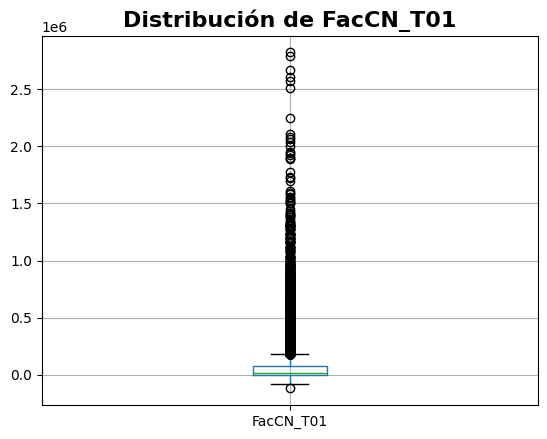

In [69]:
data.boxplot(column="FacCN_T01")
plt.title("Distribución de FacCN_T01", fontsize=16, fontweight="bold")
plt.show()

In [70]:
outliers = buscar_atipicos(data, 'FacCN_T01')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T01), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T01) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4235 Outliers de un total de 51124 registros
Estos representan un total de 8.28% del total de registros


#### 2.7.1.2 Mes 2

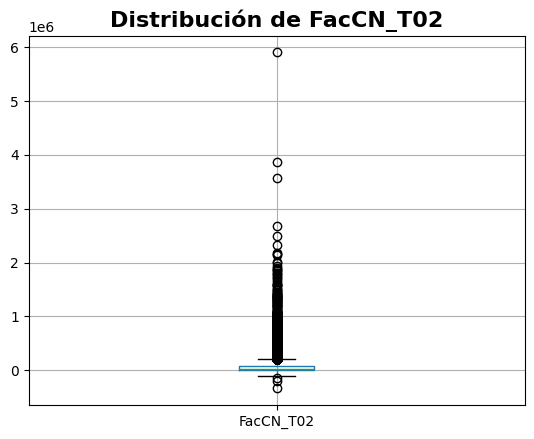

In [71]:
data.boxplot(column="FacCN_T02")
plt.title("Distribución de FacCN_T02", fontsize=16, fontweight="bold")
plt.show()

In [72]:
outliers = buscar_atipicos(data, 'FacCN_T02')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T02), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T02) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4058 Outliers de un total de 51124 registros
Estos representan un total de 7.94% del total de registros


#### 2.7.1.3 Mes 3

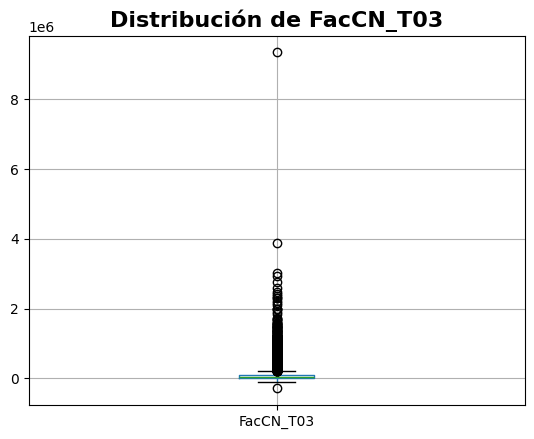

In [73]:
data.boxplot(column="FacCN_T03")
plt.title("Distribución de FacCN_T03", fontsize=16, fontweight="bold")
plt.show()

In [74]:
outliers = buscar_atipicos(data, 'FacCN_T03')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T03), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T03) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3863 Outliers de un total de 51124 registros
Estos representan un total de 7.56% del total de registros


#### 2.7.1.4 Mes 4

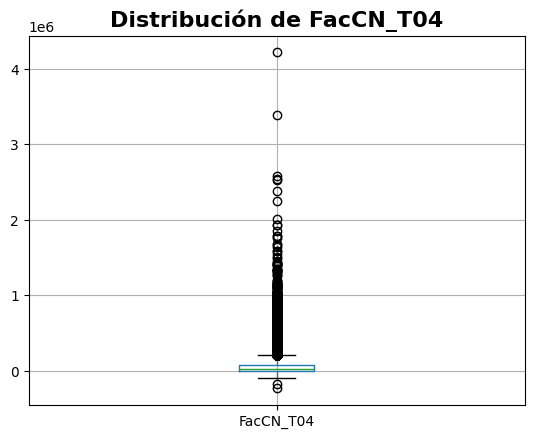

In [75]:
data.boxplot(column="FacCN_T04")
plt.title("Distribución de FacCN_T04", fontsize=16, fontweight="bold")
plt.show()

In [76]:
outliers = buscar_atipicos(data, 'FacCN_T04')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T04), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T04) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3959 Outliers de un total de 51124 registros
Estos representan un total de 7.74% del total de registros


#### 2.7.1.5 Mes 5

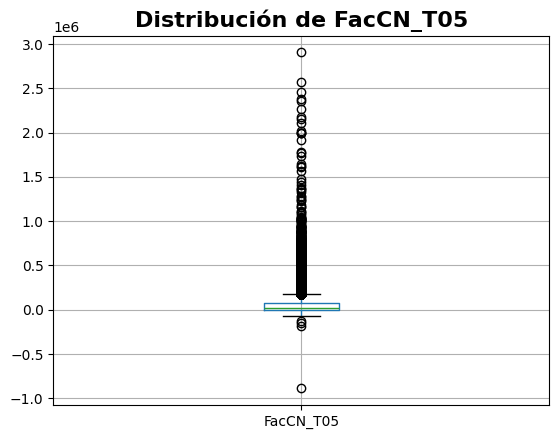

In [77]:
data.boxplot(column="FacCN_T05")
plt.title("Distribución de FacCN_T05", fontsize=16, fontweight="bold")
plt.show()

In [78]:
outliers = buscar_atipicos(data, 'FacCN_T05')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T05), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T05) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4316 Outliers de un total de 51124 registros
Estos representan un total de 8.44% del total de registros


#### 2.7.1.6 Mes 6

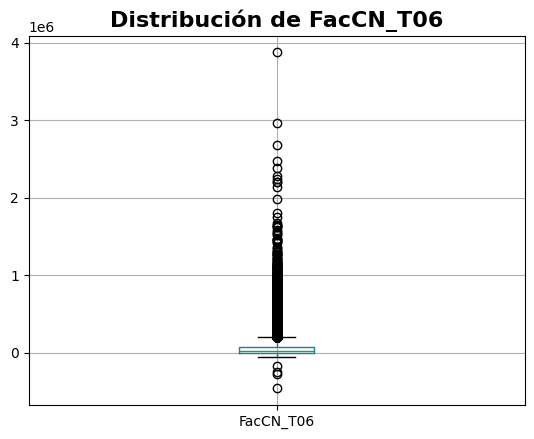

In [79]:
data.boxplot(column="FacCN_T06")
plt.title("Distribución de FacCN_T06", fontsize=16, fontweight="bold")
plt.show()

In [80]:
outliers = buscar_atipicos(data, 'FacCN_T06')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T06), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T06) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4328 Outliers de un total de 51124 registros
Estos representan un total de 8.47% del total de registros


#### 2.7.1.7 Mes 7

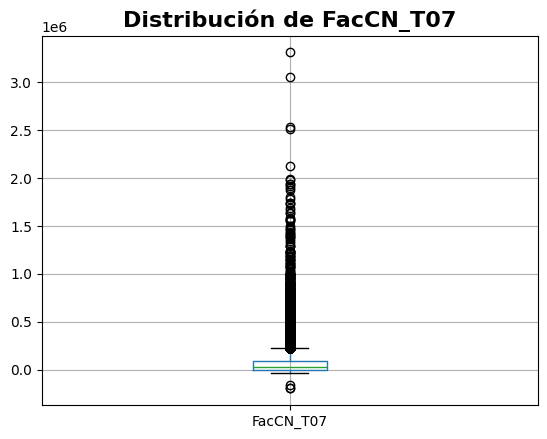

In [81]:
data.boxplot(column="FacCN_T07")
plt.title("Distribución de FacCN_T07", fontsize=16, fontweight="bold")
plt.show()

In [82]:
outliers = buscar_atipicos(data, 'FacCN_T07')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T07), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T07) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3651 Outliers de un total de 51124 registros
Estos representan un total de 7.14% del total de registros


#### 2.7.1.8 Mes 8

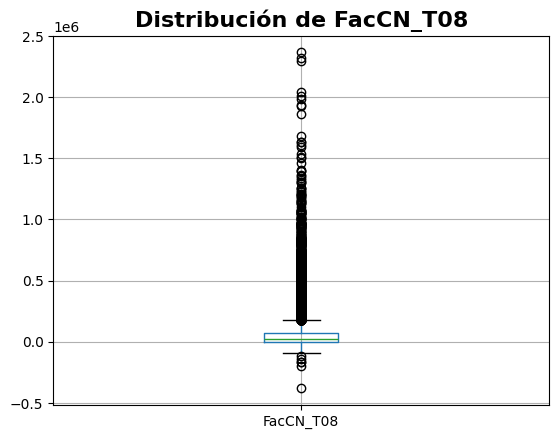

In [83]:
data.boxplot(column="FacCN_T08")
plt.title("Distribución de FacCN_T08", fontsize=16, fontweight="bold")
plt.show()

In [84]:
outliers = buscar_atipicos(data, 'FacCN_T08')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T08), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T08) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4034 Outliers de un total de 51124 registros
Estos representan un total de 7.89% del total de registros


#### 2.7.1.9 Mes 9

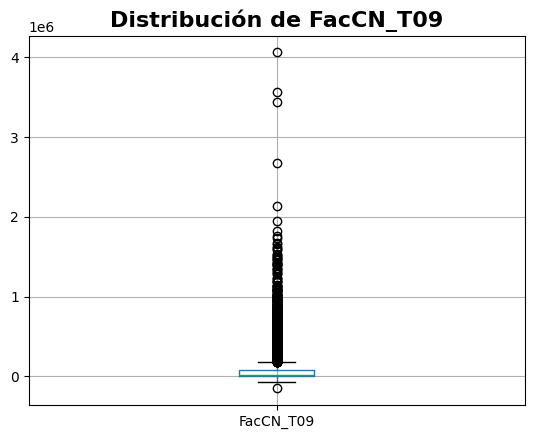

In [85]:
data.boxplot(column="FacCN_T09")
plt.title("Distribución de FacCN_T09", fontsize=16, fontweight="bold")
plt.show()

In [86]:
outliers = buscar_atipicos(data, 'FacCN_T09')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T09), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T09) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3825 Outliers de un total de 51124 registros
Estos representan un total de 7.48% del total de registros


#### 2.7.1.10 Mes 10

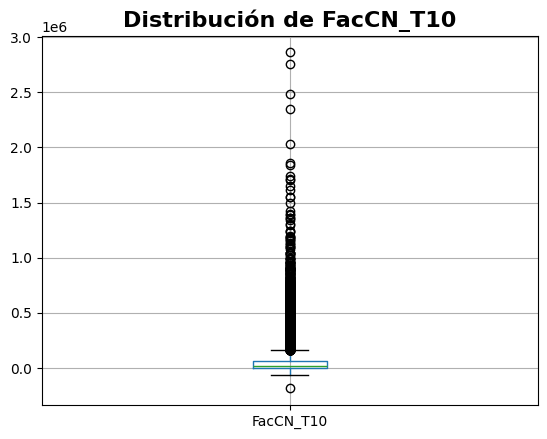

In [87]:
data.boxplot(column="FacCN_T10")
plt.title("Distribución de FacCN_T10", fontsize=16, fontweight="bold")
plt.show()

In [88]:
outliers = buscar_atipicos(data, 'FacCN_T10')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T10), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T10) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4039 Outliers de un total de 51124 registros
Estos representan un total de 7.9% del total de registros


#### 2.7.1.11 Mes 11

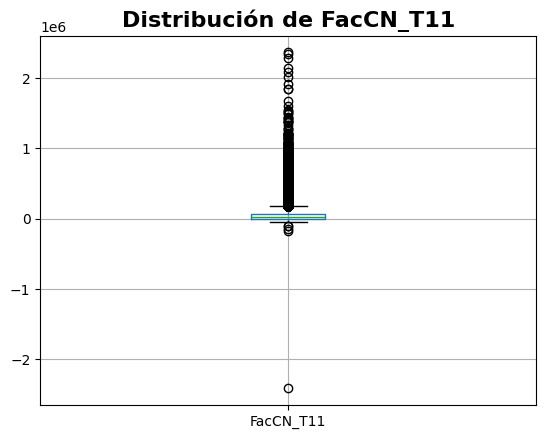

In [89]:
data.boxplot(column="FacCN_T11")
plt.title("Distribución de FacCN_T11", fontsize=16, fontweight="bold")
plt.show()

In [90]:
outliers = buscar_atipicos(data, 'FacCN_T11')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T01), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T11) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3745 Outliers de un total de 51124 registros
Estos representan un total de 7.33% del total de registros


#### 2.7.1.12 Mes 12

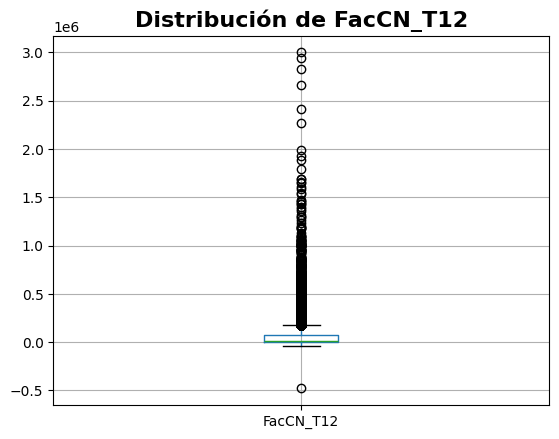

In [91]:
data.boxplot(column="FacCN_T12")
plt.title("Distribución de FacCN_T12", fontsize=16, fontweight="bold")
plt.show()

In [92]:
outliers = buscar_atipicos(data, 'FacCN_T12')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T12), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T12) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3681 Outliers de un total de 51124 registros
Estos representan un total de 7.2% del total de registros


# Fase 3 - Preparación de datos

## 3.1 Tratamiento de valores negativos

En la sección 2.6 se pudo ver la existencia de valores negativos. Esta fase localizará, verá porcentualmente su cantidad y tratará estos registros con valores negativos.

In [93]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_neg = (data[facCN_cols] < 0).sum()
porc_neg = round((cant_neg / len(data)) * 100, 2)

neg_df = pd.DataFrame({'Negativos': cant_neg, 'Porcentaje (%)': porc_neg})
neg_df

Negativos  Porcentaje (%)
FacCN_T01          7            0.01
FacCN_T02          9            0.02
FacCN_T03          6            0.01
FacCN_T04          7            0.01
FacCN_T05         21            0.04
FacCN_T06         23            0.04
FacCN_T07          8            0.02
FacCN_T08         22            0.04
FacCN_T09          5            0.01
FacCN_T10          5            0.01
FacCN_T11          6            0.01
FacCN_T12          5            0.01

Una vez identificados los valores negativos, se procede a tratarlos.

In [94]:
for i in range(1, 13):
    data[f'FacCN_T{str(i).zfill(2)}'] = data[f'FacCN_T{str(i).zfill(2)}'].mask(data[f'FacCN_T{str(i).zfill(2)}'] < 0, np.nan)

Una vez hecho, se comprueba que efectivamente los cambios fueron realizados, procediendo a el resto del proyecto.

In [95]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_neg = (data[facCN_cols] < 0).sum()
porc_neg = round((cant_neg / len(data)) * 100, 2)

neg_df = pd.DataFrame({'Negativos': cant_neg, 'Porcentaje (%)': porc_neg})
neg_df

Negativos  Porcentaje (%)
FacCN_T01          0             0.0
FacCN_T02          0             0.0
FacCN_T03          0             0.0
FacCN_T04          0             0.0
FacCN_T05          0             0.0
FacCN_T06          0             0.0
FacCN_T07          0             0.0
FacCN_T08          0             0.0
FacCN_T09          0             0.0
FacCN_T10          0             0.0
FacCN_T11          0             0.0
FacCN_T12          0             0.0

### 3.2 Tratamiento de atípicos

Para el tratamiento de atípicos se optó por nulificar estos valores. Se tomó esta decisión porque se busca resolver todas las problemáticas de la data en el tratamiento de nulos, ergo se necesita de que al llegar a la fase de tratamiento de nulos (3.3), la data se encuentre en el mejor estado posible.

In [96]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

Nulos  Porcentaje (%)
FacCN_T01      7            0.01
FacCN_T02     21            0.04
FacCN_T03     16            0.03
FacCN_T04     26            0.05
FacCN_T05     46            0.09
FacCN_T06     66            0.13
FacCN_T07    841            1.65
FacCN_T08   2222            4.35
FacCN_T09   3805            7.44
FacCN_T10   5196           10.16
FacCN_T11   6638           12.98
FacCN_T12   8256           16.15

In [97]:
for i in range(1, 13):
    outliers = buscar_atipicos(data, f'FacCN_T{str(i).zfill(2)}')
    print(len(outliers[f'FacCN_T{str(i).zfill(2)}']))
    for n in range(len(outliers[f'FacCN_T{str(i).zfill(2)}'])):
        num_indice_atipico = outliers[f'FacCN_T{str(i).zfill(2)}'].index[n]
        data.loc[num_indice_atipico, f'FacCN_T{str(i).zfill(2)}'] = np.nan
        

#print('Hay un total de', len(outliers.FacCN_T01), 'Outliers de un total de', data.shape[0],'registros')
#print(f'Estos representan un total de {round((len(outliers.FacCN_T01) * 100) / data.shape[0], 2)}% del total de registros')

4234
4054
3862
3957
4306
4320
3647
4024
3824
4033
3740
3680


In [98]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

Nulos  Porcentaje (%)
FacCN_T01   4241            8.30
FacCN_T02   4075            7.97
FacCN_T03   3878            7.59
FacCN_T04   3983            7.79
FacCN_T05   4352            8.51
FacCN_T06   4386            8.58
FacCN_T07   4488            8.78
FacCN_T08   6246           12.22
FacCN_T09   7629           14.92
FacCN_T10   9229           18.05
FacCN_T11  10378           20.30
FacCN_T12  11936           23.35

## 3.3 Tratamiento de nulos

Para el tratamiento de nulos se analizará la posibilidad de aplicar la metodología de tratamiento, el impacto de todos los posibles tratamientos, y de acuerdo a los resultados entregados se escogerá la mejor metodología de tratamiento de nulos.

### 3.3.1 Plan de tratamiento de nulos

Para el tratamiento de nulos, se analizará cada una de las técnicas de tratamiento de nulos y se obtendrán los estadísticos resultantes de cada una de estas. Las metodologías a aplicar son...
- Eliminación / Invalidación
- Inputación
  - Valores estadísticos
  - KNNInputer
  

Del análisis de la sección de Reconocimiento de nulos 2.4 se observó de que la variable 'target' no presentaba nulos, sin embargo la mayoría de meses de la variable 'FacCN_T99' sí presentan nulos. Estos abarcan desde el mes 2 (FacCN_T02) hasta el mes 12 (FacCN_T12).

### 3.3.2 Testing de resultados del tratamiento de nulos

En esta sección se encuentran contenidas todas las metodologías de tratamiento de nulos utilizadas para el tratamiento.

#### 3.3.2.1 Eliminación / Invalidación

Esta técnica apunta a eliminar los registros que posean nulos. Aunque esta metodología algunos la consideren correcta, no será utilizada dentro del desarrollo de este proyecto puesto que se prioriza mantener los datos lo menos intervenido posibles. En cambio lo que se hará es clasificar aquellos registros que posean nulos e "invalidarlos" para así no ser considerados dentro del análisis de la Data.

##### 3.3.2.1.1 Preparación de la Data para invalidación

Con el propósito de hacer esto primero crearemos una copia de la Data real para no realizar cambios que puedan afectar a la Data.

In [99]:
data_invalidacion = data.copy()

In [100]:
data_invalidacion.head()

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0   1          160    M    13.0    43     NaN         130           1   
1   2          160    H    13.0    46  143640          69           1   
2   3          170    H    13.0    45  929106          24           1   
3   4          151    H    13.0    46  172447         134           0   
4   5          170    H    13.0    46  805250         116           0   

   Adicional  Dualidad  ...  PagoNac_T01  PagoInt_T01  EeccNac_T01  \
0          1         0  ...        33000            0      1099866   
1          0         0  ...       300000            0       214592   
2          1         0  ...       216676            0            0   
3          1         0  ...        60000            0       272762   
4          1         1  ...       272925            0       249562   

   EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  target  \
0            0    1099866      15080          0           R       0   
1            0     214592      83596          0           R       0   
2            0       7400          0          0           T       0   
3            0     272762      10591          0           R       0   
4            0      75339     377782          0           R       0   

  columna_año  
0    386223.0  
1    972082.0  
2   1685212.0  
3    414286.0  
4   3527268.0  

[5 rows x 575 columns]

Después crearemos una nueva columna llamada 'registro_invalido' la cual será llenada con 'False'. Esto busca que, cuando recorramos cada una de las columnas de 'FacCN_T99', podamos cambiar cuantas veces sea necesario un registro a 'True' cuando encuentre un nulo.

In [101]:
data_invalidacion['registro_invalido'] = False
data_invalidacion.registro_invalido

0        False
1        False
2        False
3        False
4        False
         ...  
51119    False
51120    False
51121    False
51122    False
51123    False
Name: registro_invalido, Length: 51124, dtype: bool

Para comprobar de que la sentencia se encuentre ejecutada de buena manera se obtuvo los índices de los registros que poseían valores nulos. Como referencia, el primer valor nulo del mes 02 es el 9343, por tanto este se tomará como comprobante para validar de que se hizo de manera correcta la transformación de 'registro_invalido'.

In [102]:
for n in range(1, 13):
    print('---')
    print(f'mes número {str(n).zfill(2)}')
    print('-')
    
    for i in range(data.shape[0]):
        if data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna()[i] == True:
            print(data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna().index[i])
        else:
            pass

---
mes número 01
-
2
10
54
56
61
67
69
75
90
91
92
94
96
113
116
126
128
131
143
147
159
161
178
179
180
195
197
198
200
206
216
221
223
230
243
282
295
299
302
304
318
319
331
333
336
338
359
362
370
380
408
410
414
423
439
450
457
458
465
473
513
523
524
542
544
548
553
560
563
572
579
587
588
591
593
602
614
626
627
660
662
670
721
730
749
757
766
769
794
808
824
837
853
855
874
880
884
894
899
901
906
923
930
954
960
969
991
996
999
1004
1010
1029
1039
1063
1075
1083
1091
1094
1096
1097
1103
1118
1124
1135
1149
1151
1161
1185
1197
1228
1231
1234
1235
1245
1249
1250
1260
1267
1278
1279
1281
1287
1308
1320
1323
1324
1329
1348
1349
1353
1355
1363
1388
1389
1417
1438
1470
1489
1497
1499
1520
1521
1549
1564
1565
1566
1586
1588
1601
1624
1628
1631
1645
1665
1667
1671
1674
1675
1695
1700
1722
1755
1757
1762
1769
1773
1774
1775
1776
1785
1793
1797
1800
1809
1812
1819
1831
1834
1836
1853
1857
1862
1864
1882
1899
1912
1931
1950
1972
1976
1984
1986
1991
1995
2001
2002
2008
2014
2015
2020
203

Una vez se valida de que los registros mantienen cierta coherencia con lo explorado en la Data, procedemos a cambiar los valores de la columna 'registro_invalido' a los valores correspondientes.

In [103]:
print('Inicio de procesamiento de datos')
for n in range(1, 13):
    print(f'mes número {str(n).zfill(2)} OK')
    for i in range(data.shape[0]):
        if data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna()[i] == True:
            num_indice_nulo = data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna().index[i]
            data_invalidacion.loc[num_indice_nulo, 'registro_invalido'] = True
        else:
            pass
print('Procesamiento de data finalizado')

Inicio de procesamiento de datos
mes número 01 OK
mes número 02 OK
mes número 03 OK
mes número 04 OK
mes número 05 OK
mes número 06 OK
mes número 07 OK
mes número 08 OK
mes número 09 OK
mes número 10 OK
mes número 11 OK
mes número 12 OK
Procesamiento de data finalizado


Se comprueba de que la tabla realmente posea registros con valores 'True'.

In [104]:
data_invalidacion[['registro_invalido']][data_invalidacion.registro_invalido == True]

registro_invalido
1                   True
2                   True
4                   True
6                   True
10                  True
...                  ...
51115               True
51116               True
51117               True
51120               True
51122               True

[28652 rows x 1 columns]

Se corrobora lo establecido, el registro 9343 posee un valor 'True', por tanto no se considera de que hayan problemas con esta trasnformación.

In [105]:
data_invalidacion['registro_invalido'].iloc[9343]

np.True_

##### 3.3.2.1.2 Obtención de estadísticos de Data Nulificada

Se obtienen y guardan los estadísticos del 2do y 12vo mes de acuerdo a lo establecido en la fase 2.6. Además se muestra como referencia los estadístico de todos los meses.

In [106]:
# Guarda datos estadísticos del mes 2 y 12
data_inv_2do12vo = round(data_invalidacion[['FacCN_T02', 'FacCN_T12']][data_invalidacion['registro_invalido'] == False].describe(), 2)
# Periodo del 1er al 6to mes
round(data_invalidacion[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']][data_invalidacion['registro_invalido'] == False].describe(), 2)

FacCN_T01  FacCN_T02  FacCN_T03  FacCN_T04  FacCN_T05  FacCN_T06
count   22472.00   22472.00   22472.00   22472.00   22472.00   22472.00
mean    29168.36   33552.27   36112.28   34812.26   27662.83   31319.29
std     40730.33   45149.62   47810.15   45824.55   38407.88   42432.47
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%      8700.00   13562.00   15968.00   15421.00    9590.00   12990.00
75%     46871.25   52970.00   56975.50   55000.00   43796.25   49205.00
max    183629.00  207840.00  221123.00  209820.00  173990.00  196093.00

In [107]:
# Periodo del 7mo al 12vo mes
round(data_invalidacion[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']][data_invalidacion['registro_invalido'] == False].describe(), 2)

FacCN_T07  FacCN_T08  FacCN_T09  FacCN_T10  FacCN_T11  FacCN_T12
count   22472.00   22472.00   22472.00   22472.00   22472.00   22472.00
mean    39094.19   29857.70   31310.73   26790.30   30204.19   28869.86
std     48429.83   39264.11   40745.25   36405.43   39593.34   39615.65
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%     21303.50   13000.00   14511.50    9990.00   13660.00    9743.00
75%     61163.50   47671.25   50000.00   43090.25   48500.00   46424.25
max    223080.00  179490.00  185756.00  165946.00  178404.00  177705.00

#### 3.3.2.2 Inputación

Esta sección, a diferencia de la anterior, busca 'Inputar' valores dentro de los nulos para intentar dañar lo menos posible la Data. Dentro del proyecto se estableció 2 formas de hacer esto, esto es, a través de los 'Estadísticos', o a través del 'KNNInputer'.

##### 3.3.2.2.1 Estadísticos

Debido a la presencia de valores atípicos en la data, los valores serán imputados por la mediana de cada columna.

Se crea una copia del DataFrame para probar el método sin afectar a los datos reales.


In [108]:
median_copia = data.copy()

Se obtienen los valores de la mediana para cada columna y luego se reemplazan, fila por fila, los datos nulos.


In [109]:
median = round(median_copia[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]].median(), 2)

for i in range(1, 13):
    cols = median_copia[f'FacCN_T{str(i).zfill(2)}']
    median_copia[f'FacCN_T{str(i).zfill(2)}'] = cols.fillna(median.iloc[i-1])

In [110]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = median_copia[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(median_copia)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

Nulos  Porcentaje (%)
FacCN_T01      0             0.0
FacCN_T02      0             0.0
FacCN_T03      0             0.0
FacCN_T04      0             0.0
FacCN_T05      0             0.0
FacCN_T06      0             0.0
FacCN_T07      0             0.0
FacCN_T08      0             0.0
FacCN_T09      0             0.0
FacCN_T10      0             0.0
FacCN_T11      0             0.0
FacCN_T12      0             0.0

In [111]:
# Se guardan los valores del mes 02 y del mes 12
data_median_2vo12vo = round(median_copia[['FacCN_T02', 'FacCN_T12']].describe(), 2)

Se visualiza los estadísticos de cada uno de los meses para mantener de referencia.

In [112]:
round(median_copia[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']].describe(), 2)

FacCN_T01  FacCN_T02  FacCN_T03  FacCN_T04  FacCN_T05  FacCN_T06
count   51124.00   51124.00   51124.00   51124.00   51124.00   51124.00
mean    31432.55   37225.99   40639.49   38010.71   29558.46   34113.08
std     44294.16   49699.68   53122.34   50122.29   41474.10   46379.05
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%      9658.00   15546.00   18440.00   16590.00    9974.50   13990.00
75%     49900.00   57970.00   63785.75   59717.25   45970.00   52685.50
max    183670.00  207863.00  221402.00  209916.00  174013.00  196125.00

In [113]:
round(median_copia[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']].describe(), 2)

FacCN_T07  FacCN_T08  FacCN_T09  FacCN_T10  FacCN_T11  FacCN_T12
count   51124.00   51124.00   51124.00   51124.00   51124.00   51124.00
mean    41712.07   30423.29   31155.16   25606.76   28294.13   26271.68
std     52742.10   42145.01   42773.47   37833.09   40044.40   39658.06
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%     21153.00   11485.00   12949.00    7826.00   11174.50    8164.00
75%     64880.00   46180.00   46384.00   37547.50   40195.75   36000.00
max    223272.00  179748.00  185758.00  165950.00  178490.00  177804.00

##### 3.3.2.2.2 KNNInputer

Como segunda opción, se utiliza el algoritmo 'K-Nearest Neighbors' de la biblioteca 'scikit-learn' para reemplazar los valores nulos.

Se crea una copia del DataFrame para probar el método sin afectar a los datos reales.

In [114]:
knn_copia = data.copy()

Se crea el objeto de K-Nearest Neighbors, considerando los dos vecinos más cercanos con el mismo peso en el cálculo del valor imputado.

In [115]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

El algoritmo de K-Nearest Neighbors reemplaza los valores nulos de cada columna FacCN_T99, fila a fila, por valores obtenidos desde registros similares al que se encuentra en tratamiento.

In [116]:
knn_copia[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]] = knn_imputer.fit_transform(knn_copia[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]])

Se visualiza si los nulos fueron tratados dentro de la Data

In [117]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = knn_copia[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(knn_copia)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

Nulos  Porcentaje (%)
FacCN_T01      0             0.0
FacCN_T02      0             0.0
FacCN_T03      0             0.0
FacCN_T04      0             0.0
FacCN_T05      0             0.0
FacCN_T06      0             0.0
FacCN_T07      0             0.0
FacCN_T08      0             0.0
FacCN_T09      0             0.0
FacCN_T10      0             0.0
FacCN_T11      0             0.0
FacCN_T12      0             0.0

Se visualiza el total de los meses y se guarda los meses 02 y 12.

In [118]:
data_knn_2do12vo = round(knn_copia[['FacCN_T02', 'FacCN_T12']].describe(), 2)
round(knn_copia[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']].describe(), 2)

FacCN_T01  FacCN_T02  FacCN_T03  FacCN_T04  FacCN_T05  FacCN_T06
count   51124.00   51124.00   51124.00   51124.00   51124.00   51124.00
mean    34671.96   42022.46   46097.30   43172.42   33386.09   38229.94
std     46094.81   52690.55   56907.03   53826.32   43881.24   48890.65
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%     11165.00   19912.00   22470.00   20000.00   12537.50   16990.50
75%     58504.75   70400.00   76383.88   71636.75   55779.75   63900.50
max    183670.00  207863.00  221402.00  209916.00  174013.00  196125.00

In [119]:
round(knn_copia[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']].describe(), 2)

FacCN_T07  FacCN_T08  FacCN_T09  FacCN_T10  FacCN_T11  FacCN_T12
count   51124.00   51124.00   51124.00   51124.00   51124.00   51124.00
mean    45472.04   34326.49   35299.46   30917.71   33683.28   33430.13
std     55437.93   44743.56   46240.92   41086.21   43719.03   43715.72
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%     23800.00   13750.00   13500.00   10000.00   13750.00   12350.00
75%     74884.00   57256.75   58785.00   52280.00   57184.00   58500.00
max    223272.00  179748.00  185758.00  165950.00  178490.00  177804.00

### 3.3.3 Metodología de tratamiento de nulos

Para determinar el mejor tratamiento de nulos se comparará los resultados del tratamiento de nulos con la versión original a través de valores y gráficos.

In [127]:
# Función para ver en un grafico de curva la efectividad del tratamiento de nulos
def compara_tratamientos(original : pd.DataFrame, invalidacion : pd.DataFrame,
                        mediana_inputed : pd.DataFrame,
                        knn_inputed : pd.DataFrame, column : str):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(original[column], label="Original", color="blue")
    sns.kdeplot(invalidacion[column], label="Invalidar nulos", color="red")
    sns.kdeplot(knn_inputed[column], label="Imputación k-NN", color="orange")
    sns.kdeplot(mediana_inputed[column], label="Imputación por el promedio", color="green")
    
    plt.title(f"Comparación de métodos de imputación para '{column}'",
              fontsize=18, fontweight="bold")
    plt.legend()
    plt.show()

# Función para ver en un grafico de curva la efectividad del tratamiento de nulos
def sin_tratamiento(original : pd.DataFrame, column : str):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(original[column], label="Original", color="blue")
    
    plt.title(f"Comparación de métodos de imputación para '{column}'",
              fontsize=18, fontweight="bold")
    plt.legend()
    plt.show()

En el proceso de análisis se descubrió de que no se podía ver la versión original (sin tratamiento) puesto que las versiones del tratamiento se superponían con esta. Por esta razón hay una función separada para visualizar la versión sin tratamiento.

In [161]:
testing_Fac = round(data[['FacCN_T02','FacCN_T12']].describe(),2)

Se obtienen los valores de testeo de la Data en este punto, puesto que ahora ya se han tratado los atípicos.

#### 3.3.3.1 Mes 02

Se obtienen los gráficos de la versión original y la versión con los tratamientos.

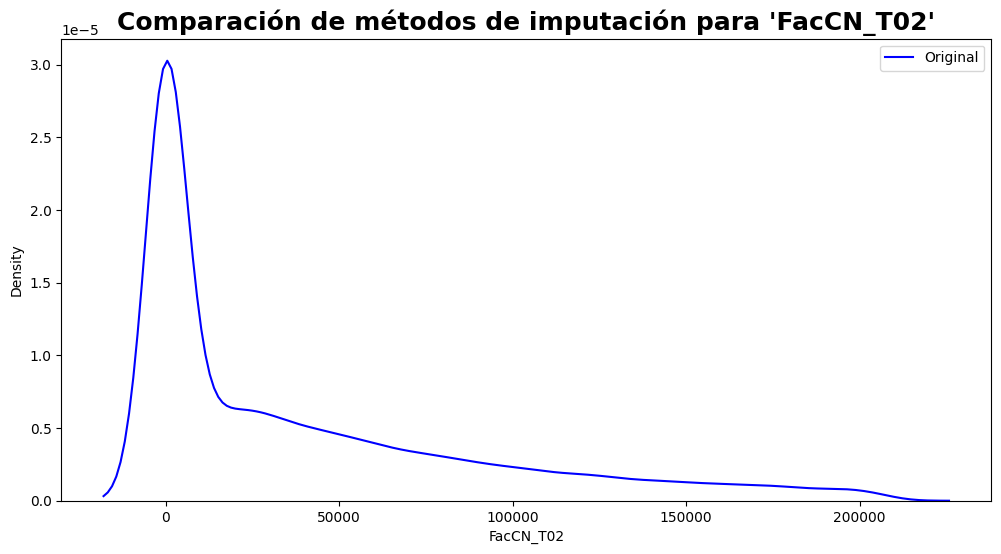

In [128]:
sin_tratamiento(data, "FacCN_T02")

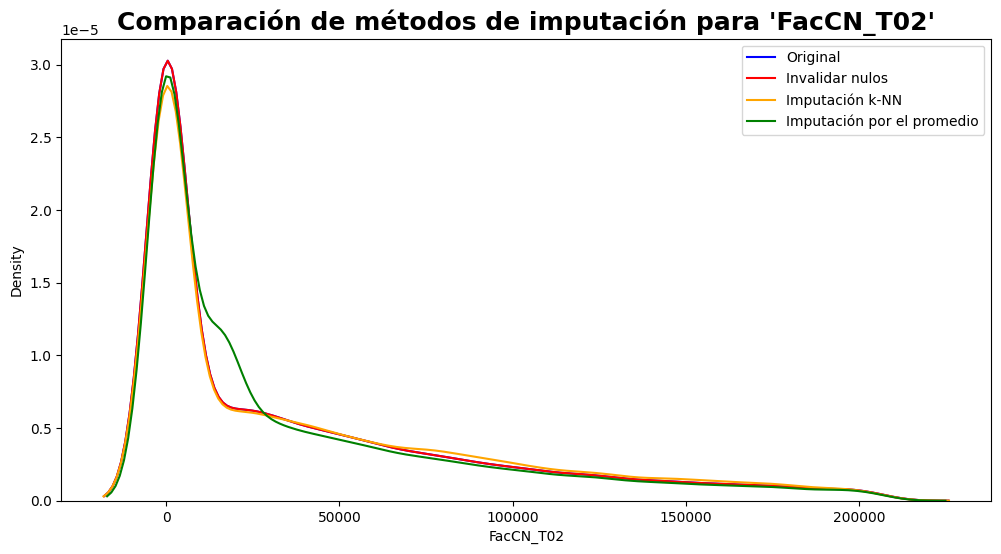

In [129]:
compara_tratamientos(data, data_invalidacion, median_copia, knn_copia, "FacCN_T02")

In [162]:
dfComp = pd.DataFrame([testing_Fac['FacCN_T02'], data_inv_2do12vo['FacCN_T02'], data_knn_2do12vo['FacCN_T02'], data_median_2vo12vo['FacCN_T02']])
dfComp

count      mean       std  min  25%      50%      75%       max
FacCN_T02  47049.0  39103.74  51378.62  0.0  0.0  15546.0  63522.0  207863.0
FacCN_T02  22472.0  33552.27  45149.62  0.0  0.0  13562.0  52970.0  207840.0
FacCN_T02  51124.0  42022.46  52690.55  0.0  0.0  19912.0  70400.0  207863.0
FacCN_T02  51124.0  37225.99  49699.68  0.0  0.0  15546.0  57970.0  207863.0

#### 3.3.3.2 Mes 12

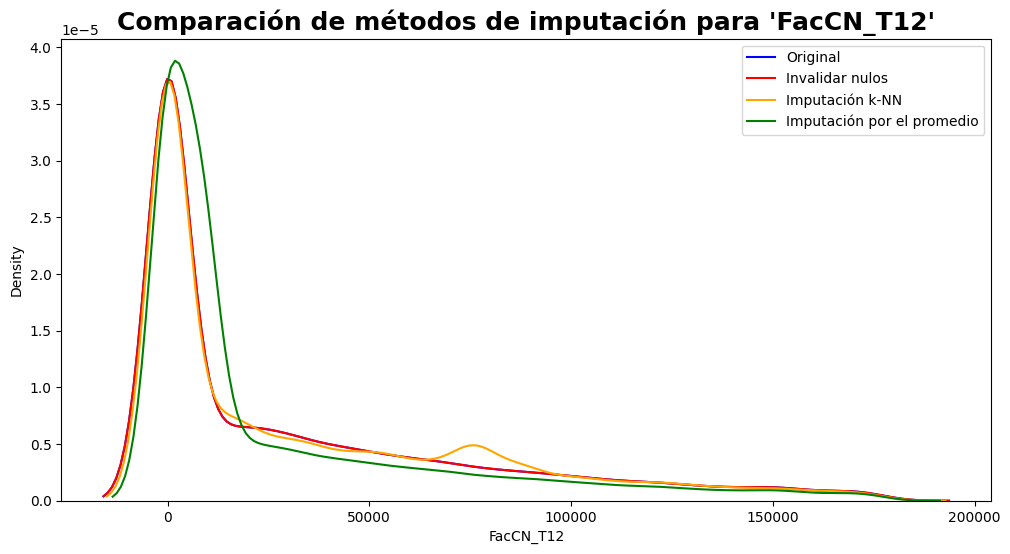

In [130]:
compara_tratamientos(data, data_invalidacion, median_copia, knn_copia, "FacCN_T12")

In [163]:
dfComp = pd.DataFrame([testing_Fac['FacCN_T12'], data_inv_2do12vo['FacCN_T12'], data_knn_2do12vo['FacCN_T12'], data_median_2vo12vo['FacCN_T12']])
dfComp

count      mean       std  min  25%      50%       75%       max
FacCN_T12  39188.0  31786.98  43835.14  0.0  0.0   8164.0  52317.75  177804.0
FacCN_T12  22472.0  28869.86  39615.65  0.0  0.0   9743.0  46424.25  177705.0
FacCN_T12  51124.0  33430.13  43715.72  0.0  0.0  12350.0  58500.00  177804.0
FacCN_T12  51124.0  26271.68  39658.06  0.0  0.0   8164.0  36000.00  177804.0

#### 3.2.3.3 Conclusiones

De acuerdo al análisis de gráficos, se aprecia de que el valor que más se asemeja al sin tratar es el tratamiento de invalidar nulos. Esto demuestra de que la Data no se ve afectada por invalidar registros enteros por poseer una característica con un valor nulo.

Se podría tomar esta opción como la correcta, sin embargo es necesario hacer testing a la hora de hacer las predicciones para determinar si esta es la mejor opción de tratamiento de nulos para la Data, puesto que aunque no lo parezca en los gráficos, tomar esta alternativa puede generar un sesgo dentro de la Data a raíz de que se están invalidando el resto de datos de los registros.

---

Por otro lado, el cuanto a los datos entregados en tablas...
- El 'mean', el valor más cercano es el entregado en KNN, sin embargo en ambos casos (mes 02 y 12), el mean entregado por KNN se excede
- La desviación estándar que más se acerca a los datos de prueba es el de KNN, donde la diferencia entre los 2 valores resulta mínima
---

Conclusión final

Aunque la invalidación de nulos dentro de los graficos parezca ser la opción correcta, ser tan agresivos dentro de la Data puede provocar sesgos y existe la posibilidad de que los resultados hayan sido de este modo porque el cambio en los datos, al ser graficados, no se pueden notar a simple vista. Esto resulta mucho más evidente cuando se accede a los valores específicos.

Por otro lado, cuando vemos las tablas, vemos que los valores que más se asemejan a la Data de testing es KNN. Por tanto se concluye que, hasta hacer el testing necesario en la fase de modelamiento (4), KNNInputer es la mejor metodología de tratamiento de nulos.